# Generating images from saved Generator weights
Sanity check and visual inspection of the GAN for saved weights.

In [1]:
import sys
import os
import torch
from torch.nn.functional import interpolate
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
gpu = torch.cuda.is_available()
if gpu:
    os.environ['CUDA_VISIBLE_DEVICES'] = '0'
    device = torch.device('cuda:0')
else:
    device = torch.device('cpu')
    
print('============ Demo information ============')
print('- Working directory: /{}'.format(os.getcwd().split('/')[-1]))
print('- Cuda device: {}'.format(device))
print('==========================================')

============ Demo information ============
- Working directory: /Train
- Cuda device: cpu


## Loading weights

In [3]:
from fixed_architecture import Generator, Discriminator

# Network parameters
feature_dim = 100
image_shape = (9, 112, 224)
net_size = 128

# Initialization
netG = Generator(feature_dim=feature_dim, nc=image_shape[0], num_classes_region=3,
                 net_size=net_size, batch_norm=False)
netG.to(device)

# Loading weights
weights = torch.load("./restricted/fixed_weights.pt", map_location=torch.device('cpu'))['netG']
netG.load_state_dict(weights)

<All keys matched successfully>

## Generating one VU for each region

0


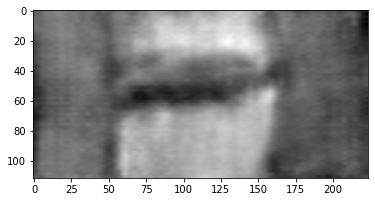

1


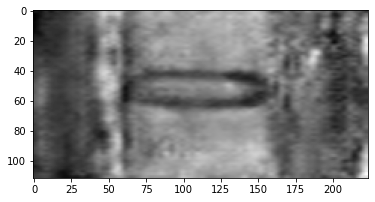

2


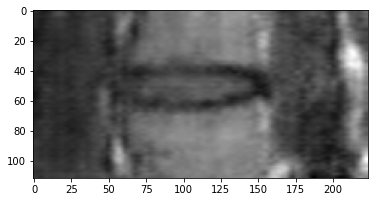

In [4]:
# loop over label values: 0 is cervical, 1 is thoracic, 2 is lumbar
for label in range(3):
    # Gen noise with for each label
    im = netG(netG.noise_gen(3, region_fill=[label])[-1])
    resized = interpolate(im, size=image_shape[1:], mode='bicubic').cpu().detach().numpy()
    print(label)
    plt.imshow(resized[0,4,:,:], cmap="gray")
    plt.show()